# Use linear transforms between successive frames to straighten video

In [19]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import affine_transform
from scipy.stats import multivariate_normal
from scipy.io import loadmat 

from otimage import readers, imagerep
from otimage.utils import plot_maxproj

In [21]:
# Frame index in raw file
t1 = 1
t2 = 500

# Load two successive frames from dataset
#img_path = '/home/mn2822/Desktop/WormOT/data/zimmer/raw/mCherry_v00065-00115.hdf5'
#with readers.ZimmerReader(img_path) as reader:
img_path = '/home/mn2822/Desktop/WormTraces/data/Vivek/1010_tail_03/data.mat'
with readers.VivekReader(img_path) as reader:
    frame_1 = reader.get_frame(t1)
    frame_2 = reader.get_frame(t2)
    img_shape = frame_1.shape

# Load MP components
#mp_path = '/home/mn2822/Desktop/WormOT/data/zimmer/mp_components/mp_0000_0050.mat'
mp_path = '/home/mn2822/Desktop/WormOT/data/vivek/1010_tail_03/mp_components/mp_0000_0900.mat'
mp_data = loadmat(mp_path)
cov = mp_data['cov']
pts_1 = mp_data['means'][t1, :, :]
pts_2 = mp_data['means'][t2, :, :]
wts_1 = mp_data['weights'][t1, :, 0]
wts_2 = mp_data['weights'][t2, :, 0]

# Frame index in transformation file
idx = t2-1

# Load transformations
#reg_path = '/home/mn2822/Desktop/WormOT/data/zimmer/registration/reg2_0003_0008.mat'
reg_path = '/home/mn2822/Desktop/WormOT/data/vivek/1010_tail_03/registration/reg3_0000_0900.mat'
reg_data = loadmat(reg_path)
alpha = reg_data['f_alpha'][idx, :]
beta = reg_data['f_beta'][idx, :, :]
p_mtx = reg_data['p_mtx'][idx, :, :]

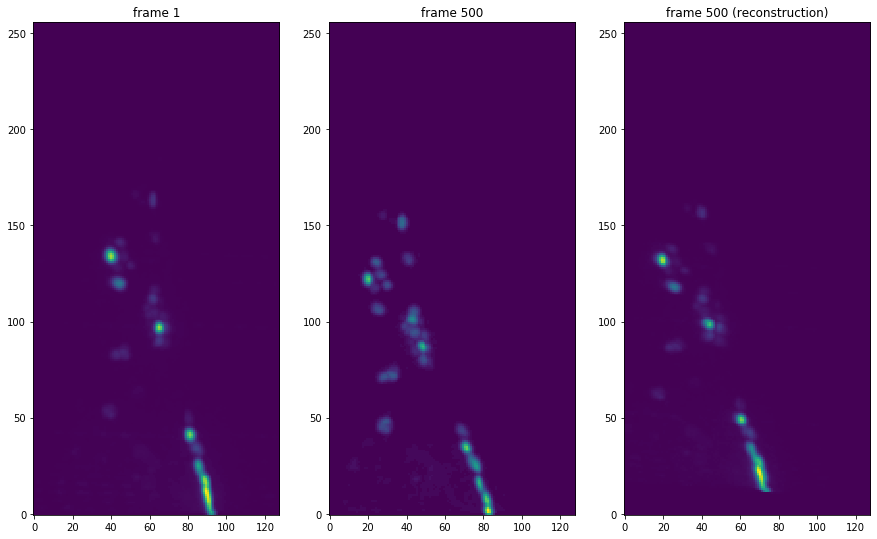

In [22]:
# Apply linear transform to first frame to reconstruct frame at time t
inv_beta = np.linalg.inv(beta)
inv_alpha = -inv_beta @ alpha
rec_img_2 = affine_transform(frame_1, inv_beta, inv_alpha)

# MP reconstruction
#rec_wts = reg_data['rec_wts']
#rec_pts_2 = reg_data['rec_pts'][idx, :, :].astype(int)
#rec_img_2 = imagerep.reconstruct_image(rec_pts_2, [cov], rec_wts.T, img_shape)

plt.figure(figsize=(15, 15))

plt.subplot(131)
plot_maxproj(frame_1)
plt.title(f'frame {t1}')
        
plt.subplot(132)
plot_maxproj(frame_2)
plt.title(f'frame {t2}')
        
plt.subplot(133)
plot_maxproj(rec_img_2)
plt.title(f'frame {t2} (reconstruction)');

In [24]:
dets = [np.linalg.det(reg_data['f_beta'][t, :, :]) for t in range(899)]
dets = np.array(dets)
print(dets)

[1.         1.         0.84718715 0.83791411 0.83262269 0.75683857
 0.75321423 0.86471012 0.75746422 0.72849256 0.77232761 0.71957162
 0.72948659 0.64327591 0.76290444 0.72735582 0.73298508 0.71579179
 0.70413797 0.70825536 0.67114688 0.66627419 0.70207216 0.77309862
 0.691521   0.70974557 0.74137621 0.67757768 0.70717085 0.7036403
 0.66639169 0.65562037 0.67449462 0.69631651 0.62780175 0.65505062
 0.69229295 0.70588771 0.77038235 0.73233879 0.79245102 0.71655639
 0.75134815 0.78388609 0.67414188 0.73996705 0.6962282  0.67046362
 0.69491265 0.67218793 0.69952629 0.70335485 0.68915914 0.66400538
 0.67473637 0.72316271 0.71464598 0.67581696 0.79841108 0.66839436
 0.62911759 0.67151463 0.70720889 0.67122502 0.66639079 0.65035115
 0.62463829 0.68566061 0.65515772 0.61285889 0.73384991 0.73374563
 0.65380443 0.71468039 0.69602722 0.77065781 0.76537983 0.75303441
 0.70239434 0.71752482 0.73825388 0.75314674 0.68462201 0.65555899
 0.69294676 0.6492846  0.65474321 0.60753017 0.64211769 0.65639

In [ ]:
#t = 6
#rec_pts_t = reg_data['rec_pts'][t, :, :].astype(int)
#rec_img_t = imagerep.reconstruct_image(rec_pts_t, [cov], wts_0, img_shape)
#plot_maxproj(rec_img_t)

In [ ]:
#img_shape = frame_1.shape
#mp_img_1 = imagerep.reconstruct_image(pts_1, [cov], wts_1, img_shape)
#mp_img_2 = imagerep.reconstruct_image(pts_2, [cov], wts_2, img_shape)

In [ ]:
#plt.figure(figsize=(10, 10))

#plt.subplot(221)
#plot_maxproj(frame_1)
#plt.title('frame 1')
        
#plt.subplot(222)
#plot_maxproj(frame_2)
#plt.title('frame 2')

#plt.subplot(223)
#plot_maxproj(mp_img_1)
#plt.title('MP reconstruction')

#plt.subplot(224)
#plot_maxproj(mp_img_2)
#plt.title('MP reconstruction');